In [3]:
import pandas as pd 
import pickle 
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train.csv")
print(df.var())

id        6.750008e+10
f_00      9.977769e-01
f_01      9.983860e-01
f_02      1.001029e+00
f_03      1.000350e+00
f_04      1.000333e+00
f_05      9.997498e-01
f_06      9.998839e-01
f_07      2.742907e+00
f_08      2.531137e+00
f_09      2.682082e+00
f_10      2.709160e+00
f_11      2.363867e+00
f_12      3.107586e+00
f_13      2.366754e+00
f_14      1.847460e+00
f_15      2.462054e+00
f_16      2.434127e+00
f_17      2.154070e+00
f_18      2.448547e+00
f_19      5.363976e+00
f_20      5.762372e+00
f_21      6.173764e+00
f_22      6.006408e+00
f_23      6.019196e+00
f_24      5.697488e+00
f_25      5.841690e+00
f_26      6.130676e+00
f_28      5.701257e+04
f_29      2.261798e-01
f_30      6.707437e-01
target    2.498177e-01
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_12424\1825614686.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())


In [5]:
df.shape # Dataframe Rows, Columns


(900000, 33)

In [6]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [7]:
del df['id']
del df['f_27']

In [8]:
df['f_26'].fillna(df['f_26'].mean(), inplace=True)

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


[0.03176295 0.03181632 0.03174873 0.02872599 0.02886071 0.02993691
 0.02885205 0.03579429 0.02905033 0.03149779 0.02821771 0.0295015
 0.03224101 0.02622792 0.0302928  0.03130488 0.02737584 0.02990594
 0.02734793 0.04221015 0.03661221 0.04877509 0.04013273 0.03970593
 0.04786817 0.04196482 0.05009846 0.03647908 0.01028469 0.03540708]


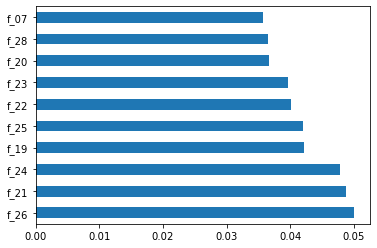

In [10]:
X = df.drop(columns=['target'])
y = df['target']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
newdf = df[["f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26","f_28","target"]]

In [12]:
newdf.head()


,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target
0,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0
1,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,1
2,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,1
3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,1
4,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,1


In [13]:
XTT = newdf.drop(columns=['target'])
yTT = newdf['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2)

In [15]:
modelKNN = KNeighborsClassifier(n_neighbors=25)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
print("Accuracy of KNN:" "\n", accuracyKNN)

Accuracy of KNN:
 0.6880777777777778


In [16]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()
print(knn_mean)

0.6609166666666667


In [17]:
dftest = pd.read_csv("test.csv")

In [18]:
dftest.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [19]:
ntest = dftest[["f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26","f_28"]]
ntest.head()

,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
0,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419
1,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825
2,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622
3,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460
4,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415


In [20]:
newCSV = dftest[['id']]
newCSV

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [21]:
predictionOnTest = modelKNN.predict(ntest)


In [22]:
predictionOnTest

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
newCSV['target'] = predictionOnTest


C:\Users\Dell\AppData\Local\Temp\ipykernel_12424\1375906750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCSV['target'] = predictionOnTest


In [24]:
newCSV


,id,target
0,900000,0
1,900001,1
2,900002,0
3,900003,0
4,900004,0
...,...,...
699995,1599995,0
699996,1599996,1
699997,1599997,0
699998,1599998,0


In [25]:
newCSV.to_csv('Ezhar.csv', index=False)